Homework 4 Report
==================================================
Note that the professor verbally mentioned that it was recommended to include both the explanations of the answers to the homework as well as the source code and plots needed for the homework in one single report. Therefore, the content in this report contains the answers and explanations for the homework as well as the underlying source code needed to provide these answers.


- The GitHub link to the Assignment Repository is :
- https://github.com/tmasse11/ECGR_5101

- The GitHub link to the Jupyter Notebook is : 
- https://github.com/tmasse11/ECGR_5101/blob/main/TerrillMassey_800670388_Homework4.ipynb


Author: Terrill Earl Massey
Student ID: 800670388

The resulting sections will cover explanations, code, and plots pertaining to PROBLEM 1 of the homework. 
===========================================================================================================================
The task is to use the a cancer patient dataset and build a SVM classification model to classiy the type of cancer (Malignant vs. benign).  This will be done for all 30 input features. Afterwards we shall determine if we can train a logistic regression over these number of features. 
 


The First step is to load the cancer dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
breast_cancer = load_breast_cancer()
input_data = breast_cancer.data
labels = np.reshape(breast_cancer.target, (569,1))

breast_data = np.concatenate([input_data, labels], axis=1)
breast_data_df = pd.DataFrame(breast_data)

features = breast_cancer.feature_names
features_labels = np.append(features, 'label')
breast_data_df.columns = features_labels
breast_data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


The next step is to Perform Preproccesing(Input Normalization) and PCA to the input datasets. Afterwards the input data and associated labels are split into a training and validation dataspace with an 80%, 20% split respectively. The percent variance of each principal component is displayed.

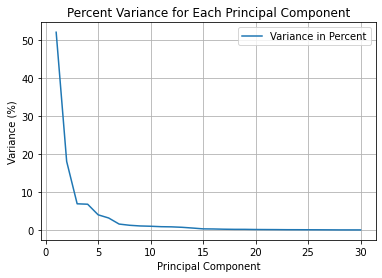

In [3]:
input_data = breast_data_df.values[:, :-1]
labels = breast_data_df.values[:, -1]


# Perform min max scaler on input data.
scaler = MinMaxScaler()
input_data = scaler.fit_transform(input_data)

# Split data for 80% 20% split.
training_data, validation_data, training_labels_pcs, validation_labels_pcs = train_test_split(input_data, labels, train_size=0.8, test_size=0.2, random_state=42)
                                                                                              


# Perform Principal Component Analysis on Input Data.
pca = PCA()
training_data_pcs = pca.fit_transform(training_data)
validation_data_pcs = pca.transform(validation_data)

# Variance for each Principal Component: 
explained_variance = 100 * pca.explained_variance_ratio_

plt.plot(range(1, len(explained_variance) +1), explained_variance, label="Variance in Percent")
plt.title("Percent Variance for Each Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance (%)")
plt.legend()
plt.grid()
plt.show()




As illustrated in the output of section [8], principal component 1 contains the most variance, and each subsequent principal component contains less variance. This shows that most of the information could be fit into the first few principal components. 

The next step is to build an SVM classifier to classify the type of cancer. The types of cancers are Malignant(positive classification) or benign (negative classification). 
During the SVM classifier construction, multiple K component values will be used in order to determine the optimum K value that yields the highest classification accuracy. A linear kernel will be used in the SVM classifier while locating the optimum K value.

In [4]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


max_possible_k_components = training_data.shape[1]

accuracy_history = np.zeros(max_possible_k_components)
precision_history = np.zeros(max_possible_k_components)
recall_history = np.zeros(max_possible_k_components)
best_k_value = 0
best_accuracy = 0

for num_principal_components in range(1, max_possible_k_components+1):
    
    model = SVC(kernel='linear') # Create a Support Vector Machine Classifier with a linear kernel. 
    model.fit(training_data_pcs[:, :num_principal_components], training_labels_pcs) # Fit the model only for the amount of principal components for the current iteration.
    predictions = model.predict(validation_data_pcs[:, :num_principal_components])
    
    # Perform metrics for the SVM classification model.
    precision_history[num_principal_components-1] = metrics.precision_score(validation_labels_pcs, predictions)
    recall_history[num_principal_components-1] = metrics.recall_score(validation_labels_pcs, predictions)
    accuracy_history[num_principal_components-1] = metrics.accuracy_score(validation_labels_pcs, predictions)
    
    # Determine if the current SVM classification model produces the best classification accuracy. 
    if metrics.accuracy_score(validation_labels_pcs, predictions) > best_accuracy:
        best_accuracy = metrics.accuracy_score(validation_labels_pcs, predictions)
        best_k_value = num_principal_components
        



        
    
    
    




<b>Answer to Question 1 of Problem 1 </b> Based on the search algorithm in section immediately above, the optimum K value is displayed in the section immediately below. 

In [5]:
print("Optimium K Value : ", best_k_value)
print("Model Accuracy Score at Best K Value: {:.4f}".format(accuracy_history[best_k_value-1]))
print("Model Recall Score at Best K Value: {:.4f}".format(recall_history[best_k_value - 1]))
print("Model Precision Score at Best K Value: {:.4f}".format(precision_history[best_k_value - 1]))

Optimium K Value :  5
Model Accuracy Score at Best K Value: 0.9825
Model Recall Score at Best K Value: 1.0000
Model Precision Score at Best K Value: 0.9726


<b> Answer to Question 2 of Problem 1 </b> The classification accuracy, precision, and recall over various K values are presented in the section immediately below. As illustrated in the plot of section immediately below, the recall, precision and accuracy does not change after the optimium K Value is met. This is because all of the needed information for the best model performance is stored in the first optimum K value(5) components. All subsequent principal components contain neglible information that could be used to help with model performance.

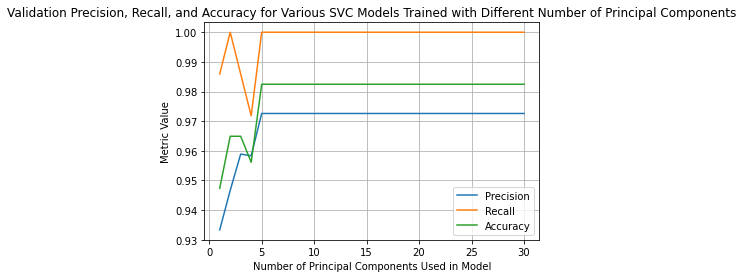

In [6]:
plt.plot(range(1, max_possible_k_components+1), precision_history, label="Precision")
plt.plot(range(1, max_possible_k_components+1), recall_history, label="Recall")
plt.plot(range(1, max_possible_k_components+1), accuracy_history, label="Accuracy")
plt.xlabel("Number of Principal Components Used in Model")
plt.ylabel("Metric Value")
plt.legend()
plt.grid()
plt.title("Validation Precision, Recall, and Accuracy for Various SVC Models Trained with Different Number of Principal Components")
plt.show()


# 

<b> Answer to Question 3 of Problem 1 </b> The below sections contain the answer to question 3.  Different Kernel methods are used with SVM classifier with the optimum K Value (5). The accuracies of each kernel method will then be compared.

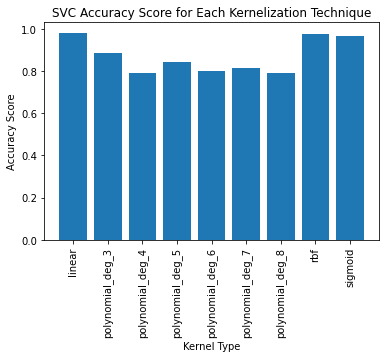

Kernel Method with Best Accuracy:  linear
Best Accuracy:  0.9824561403508771


In [7]:
kernel_methods = ['linear', 'poly', 'rbf', 'sigmoid']
polynomial_degree = [3, 4, 5, 6, 7, 8]
accuracy_history = [] 
kernel_name = []

for kernel_method in kernel_methods:
    if kernel_method == 'poly':
        for degree in polynomial_degree:
            kernel_name.append("polynomial_deg_{}".format(degree))
            model = SVC(kernel=kernel_method, degree=degree) # Create a Support Vector Machine Classifier with a polynomial kernel. 
            model.fit(training_data_pcs[:, :best_k_value], training_labels_pcs) # Fit the model with optimum K-value.
            predictions = model.predict(validation_data_pcs[:, :best_k_value])
            accuracy_history.append(metrics.accuracy_score(validation_labels_pcs, predictions))   
    
    else:
        kernel_name.append(kernel_method)
        model = SVC(kernel=kernel_method) # Create a Support Vector Machine Classifier with a specified kernel. 
        model.fit(training_data_pcs[:, :best_k_value], training_labels_pcs) # Fit the model with optimum K-value.
        predictions = model.predict(validation_data_pcs[:, :best_k_value])
        accuracy_history.append(metrics.accuracy_score(validation_labels_pcs, predictions))
        

# Plot the accuracies of each kernel method. 
plt.bar(kernel_name, accuracy_history)
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=90)
plt.title("SVC Accuracy Score for Each Kernelization Technique")
plt.show()

best_accuracy = max(accuracy_history)
best_accuracy_indx = accuracy_history.index(best_accuracy)

print("Kernel Method with Best Accuracy: ", kernel_name[best_accuracy_indx])
print("Best Accuracy: ", best_accuracy)



<b> Answer to Question 4 of Problem 1 </b> The below sections contain the answer to question 4. 

The accuracy score of the logistic regressor using PCA analysis in Homework 3 was found to be 0.9825. This accuracy was achieved with 5 principal components used by the logistic regressor.  As illustrated in the figure(bar graph that displays the accuracy of each kernel function used in SVC) in the code block immediately above, the best accuracy score for SVC is 0.982456. It is speculated that the SVC accuracy is essentially the same as the accuracy of the logistic regressor because the dataset itself is currently linearly seperable in its original dimensions.

The resulting sections will cover explanations, code, and plots pertaining to PROBLEM 2 of the homework. 
===========================================================================================================================
The task is to use the housing dataset(previously used in homework 1) and build a SVM regression model to predict housing price. We will then compare the loss of the SVM regression model to the linear regression model with regularization loss that was obtained in Homework 1. For consistency, the SVM regression model will consider the same input features that were used in Question 3b of Homework 1. 

These input features of interest are as follows: 
- area
- bedrooms
- bathrooms
- stories
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning

The results and implementation details of Homework 1 can be found at https://github.com/tmasse11/ECGR_5101/blob/main/TerrillMassey_800670388_Homework1.ipynb

 We shall first read in and format the input explanatory values and output values

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

housing_data = pd.DataFrame(pd.read_csv(r"Housing.csv")) # Read in the Housing Data Dataset
M = len(housing_data) # Number of training Points
print("Number of Training Points", M)
print("") # For display 
housing_data.info() # Display data types of the input variables.
print("")
print("================================")
housing_data.head()


Number of Training Points 545

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


The next step is to format the input variables with binary classification to a format that can be used by a regression line. This is done by converting inputs with "yes" or "no" values to 1 and 0s respectively

In [9]:
input_variable_with_binary_classification = [ 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#Mapping function for "yes" "no" values to "1" and "0" values.
def binary_map(x):
    return x.map({'yes': 1, "no" : 0})

# Apply mapping function to the housing dataset.
housing_data[input_variable_with_binary_classification] = housing_data[input_variable_with_binary_classification].apply(binary_map)
housing_data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


The next step is to split the housing dataset into a training dataset and validation dataset. A 80% 20% split is used for training and validation spaces respectively. For Preprocessing, the dataset is first normalized. 

In [10]:
from sklearn.preprocessing import MinMaxScaler

features_of_interest = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning','price']
data_of_interest = housing_data[features_of_interest] # Obtain the features of interest from the housing dataset.
data_of_interest.head()

scaler = MinMaxScaler()
data_of_interest = scaler.fit_transform(data_of_interest) # Perform Normalization on the Input Data. Min Max Scaler is used.

input_data = data_of_interest[:,:-1]  # Select the input features from features of interest
labels = data_of_interest[:,-1] # Select the housing price as labels. 

# Randomly Split the input dataset and labels into training and validation sets. 80%, 20% split is used.
df_training, df_validation, training_labels, validation_labels = train_test_split(input_data, labels, train_size=0.8, test_size=0.2, random_state=22) 

print("Training Dataset Shape: ", df_training.shape)
print("Validation Dataset Shape: ", df_validation.shape)


Training Dataset Shape:  (436, 9)
Validation Dataset Shape:  (109, 9)


<b> Answer to Question 1 and Question 2 of Problem 2 </b> The below sections contain the answer to question 1 and 2.  

In [11]:
from sklearn.svm import SVR
from sklearn import metrics

# Construct and Fit SVM Regression model

svr_rbf_model = SVR(kernel='rbf', C=2, gamma=0.1) # SVR with Radial Bias Kernel Function. 
svr_linear_model = SVR(kernel='linear', C=0.5) # SVR with Linear Kernel Function.
svr_polynomial_model = SVR(kernel='poly', C=0.25, degree=2) # SVR with Polynomial Kernel Function.

svr_rbf_predictions = svr_rbf_model.fit(df_training, training_labels).predict(df_validation)
svr_linear_predictions = svr_linear_model.fit(df_training, training_labels).predict(df_validation)
svr_polynomial_predictions = svr_polynomial_model.fit(df_training, training_labels).predict(df_validation)



# Obtain MSE loss for each SVR prediction
svr_rbf_mse_loss = metrics.mean_squared_error(validation_labels, svr_rbf_predictions)
svr_linear_mse_loss = metrics.mean_squared_error(validation_labels, svr_linear_predictions)
svr_polynomial_mse_loss = metrics.mean_squared_error(validation_labels, svr_polynomial_predictions)


print("SVR RBF MSE Loss: {:.4f}".format(svr_rbf_mse_loss))
print("SVR Linear MSE Loss: {:.4f}".format(svr_linear_mse_loss))
print("SVR Polynomial MSE Loss: {:.4f}".format(svr_polynomial_mse_loss))

SVR RBF MSE Loss: 0.0116
SVR Linear MSE Loss: 0.0121
SVR Polynomial MSE Loss: 0.0107


SVR models with different kernel functions were trained and used to predict the housing price in the df_validation dataset. Due to the high-dimensionality of this dataset, the regression model could not be plotted in a comprehensible format. 

The MSE Loss of each SVR model is also shown in the immediate code block above. The SVR model with the Polynomial kernel function contained the best validation loss of 0.0107.  The validation loss of the linear regression model with regularization used in Homework 1 was found to be 0.0091. It is speculated that the SVR model contains a higher validation loss than the linear regression model from homework 1 because the housing dataset itself may be linearly seperable without kernelization.

<b> Answer to Question 3 of Problem 2 </b> The below sections contain the answer to question 3. Since the Polynomial kernel function produced the best validation loss in  Question 1  of Problem 2, the same polynomial kernel function will be used for determining the optimal K value in PCA. 

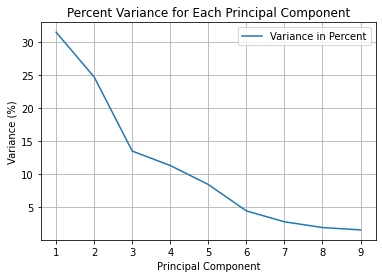

In [12]:
# Perform Principal Component Analysis on Input Data.
pca_2 = PCA()
training_data_pcs = pca_2.fit_transform(df_training)
validation_data_pcs = pca_2.transform(df_validation)


# Variance for each Principal Component: 
explained_variance = 100 * pca_2.explained_variance_ratio_

plt.plot(range(1, len(explained_variance) +1), explained_variance, label="Variance in Percent")
plt.title("Percent Variance for Each Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance (%)")
plt.legend()
plt.grid()
plt.show()


As illustrated in the output of section immediately above, principal component 1 contains the most variance, and each subsequent principal component contains less variance. The overall distribution in the plot suggests that not all information could be stored in the first 2 principal components. This could suggest that more principal components may be needed in order to achieve the best training accuracy.  The best accuracy will be determined by the lowest MSE Loss.

Optimium K Value :  9
M.S.E. Loss at Best K Value: 0.0159


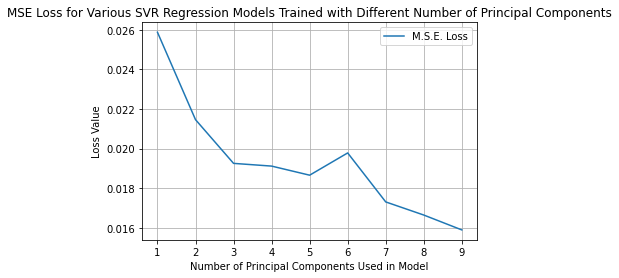

In [13]:

max_possible_k_components = training_data_pcs.shape[1]

loss_history = np.zeros(max_possible_k_components)

best_k_value = 0
best_loss = 1000

for num_principal_components in range(1, max_possible_k_components+1):
    
    model = SVR(kernel='poly', C=0.25, degree=2) # SVR with Polynomial Kernel Function.
    
    model.fit(training_data_pcs[:, :num_principal_components], training_labels) # Fit the model only for the amount of principal components for the current iteration.
    predictions = model.predict(validation_data_pcs[:, :num_principal_components])
    
    # Perform metrics for the SVM regression model.
   
    loss_history[num_principal_components-1] = metrics.mean_squared_error(validation_labels, predictions)
    
    # Determine if the current SVM regression model produces the best classification accuracy. 
    if metrics.mean_squared_error(validation_labels, predictions) < best_loss:
        best_loss = metrics.mean_squared_error(validation_labels, predictions)
        best_k_value = num_principal_components


print("Optimium K Value : ", best_k_value)
print("M.S.E. Loss at Best K Value: {:.4f}".format(loss_history[best_k_value-1]))


# Plot Recall, Accuracy, and Precision. 

plt.plot(range(1, max_possible_k_components+1), loss_history, label="M.S.E. Loss")
plt.xlabel("Number of Principal Components Used in Model")
plt.ylabel("Loss Value")
plt.legend()
plt.grid()
plt.title("MSE Loss for Various SVR Regression Models Trained with Different Number of Principal Components")
plt.show()




As indicated in the code block immediately above, the optimimum K value is 9. It is speculated that 9 is the optimal k value(k value that contains the lowest MSE loss) due to the inablility of the PCA to condense all information into the first 2 principal components as illustrated in section 12. As illustrated in section 12, the variance is spread out through a majority of the principal components.

<b> Answer to Question 4 of Problem 2 </b> The below sections contain the answer to question 4. Since the optimal K value was determined to be 9. This K value will be used to perform various kernel tricks.

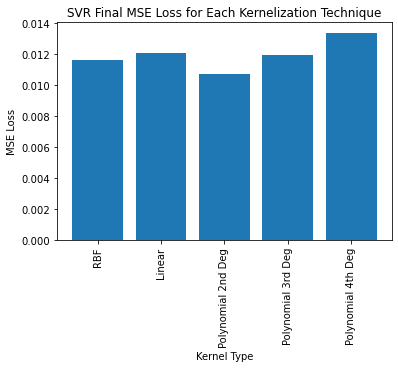

Kernel Method with Best Loss:  Polynomial 2nd Deg
Best MSE Loss:  0.01067436598355474


In [14]:



kernel_functions = ['RBF', 'Linear', "Polynomial 2nd Deg", "Polynomial 3rd Deg", "Polynomial 4th Deg"]

svr_rbf_model = SVR(kernel='rbf', C=2, gamma=0.1) # SVR with Radial Bias Kernel Function. 
svr_linear_model = SVR(kernel='linear', C=0.5) # SVR with Linear Kernel Function.
svr_polynomial_model = SVR(kernel='poly', C=0.25, degree=2) # SVR with Polynomial Kernel Function.
svr_polynomial_3_deg_model = SVR(kernel='poly', C=0.25, degree=3) # SVR with Polynomial Kernel Function.
svr_polynomial_4_deg_model = SVR(kernel='poly', C=0.25, degree=4) # SVR with Polynomial Kernel Function.
svr_rbf_predictions = svr_rbf_model.fit(df_training, training_labels).predict(df_validation)
svr_linear_predictions = svr_linear_model.fit(df_training, training_labels).predict(df_validation)
svr_polynomial_predictions = svr_polynomial_model.fit(df_training, training_labels).predict(df_validation)
svr_polynomial_3_deg_predictions = svr_polynomial_3_deg_model.fit(df_training, training_labels).predict(df_validation)
svr_polynomial_4_deg_predictions = svr_polynomial_4_deg_model.fit(df_training, training_labels).predict(df_validation)

# Obtain MSE loss for each SVR prediction
svr_rbf_mse_loss = metrics.mean_squared_error(validation_labels, svr_rbf_predictions)
svr_linear_mse_loss = metrics.mean_squared_error(validation_labels, svr_linear_predictions)
svr_polynomial_mse_loss = metrics.mean_squared_error(validation_labels, svr_polynomial_predictions)
svr_polynomial_3_deg_mse_loss = metrics.mean_squared_error(validation_labels, svr_polynomial_3_deg_predictions)
svr_polynomial_4_deg_mse_loss = metrics.mean_squared_error(validation_labels, svr_polynomial_4_deg_predictions)

regression_history = [svr_rbf_mse_loss, svr_linear_mse_loss, svr_polynomial_mse_loss, svr_polynomial_3_deg_mse_loss, svr_polynomial_4_deg_mse_loss]

# Plot the Final MSE Loss of each kernel method. 
plt.bar(kernel_functions, regression_history)
plt.xlabel("Kernel Type")
plt.ylabel("MSE Loss")
plt.xticks(rotation=90)
plt.title("SVR Final MSE Loss for Each Kernelization Technique")
plt.show()

best_loss = min(regression_history)
best_loss_indx = regression_history.index(best_loss)

print("Kernel Method with Best Loss: ", kernel_functions[best_loss_indx])
print("Best MSE Loss: ", best_loss)






The code section immediately above contains the plot "SVR Final MSE Loss for Each Kernelization Technique" this plot displays the Final MSE loss for each kernel function used in the SVR model. As illustrated in this plot, the kernel method with the best MSE loss(lowest loss) is the Polynomial 2nd Degree function. It is speculated that this kernel function has the best MSE loss due to the nature of the input data. The input data may contain a somewhat polynomial regression trend. 